In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from helpers import Trainer, plot_conf_mat, plot_roc, plot_roc_avg, plot_pie_chart, stats_test

random.seed(0)

In [2]:
X_cs_10 = np.load('npy_data_2/X_combinedSampling_10Features_task1.npy')
y_cs_10 = np.load('npy_data_2/y_combinedSampling_10Features_task1.npy')
print('X_cs_10.shape, y_cs_10.shape', X_cs_10.shape, y_cs_10.shape)

X_cs_15 = np.load('npy_data_2/X_combinedSampling_15Features_task1.npy')
y_cs_15 = np.load('npy_data_2/y_combinedSampling_15Features_task1.npy')
print('X_cs_15.shape, y_cs_15.shape', X_cs_15.shape, y_cs_15.shape)

X_cs_25 = np.load('npy_data_2/X_combinedSampling_25Features_task1.npy')
y_cs_25 = np.load('npy_data_2/y_combinedSampling_25Features_task1.npy')
print('X_cs_25.shape, y_cs_25.shape', X_cs_25.shape, y_cs_25.shape)

X_cs_all = np.load('npy_data_2/X_combinedSampling_AllFeatures_task1.npy')
y_cs_all = np.load('npy_data_2/y_combinedSampling_AllFeatures_task1.npy')
print('X_cs_all.shape, y_cs_all.shape', X_cs_all.shape, y_cs_all.shape)

classes = ['No', '>30', '<30']

X_cs_10.shape, y_cs_10.shape (62307, 10) (62307,)
X_cs_15.shape, y_cs_15.shape (74652, 15) (74652,)
X_cs_25.shape, y_cs_25.shape (113077, 25) (113077,)
X_cs_all.shape, y_cs_all.shape (118587, 45) (118587,)


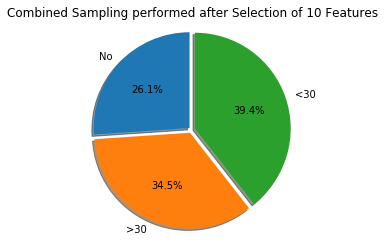

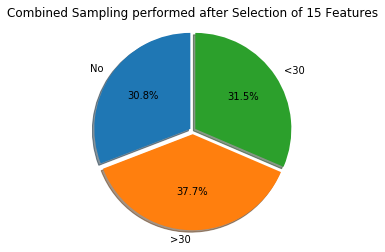

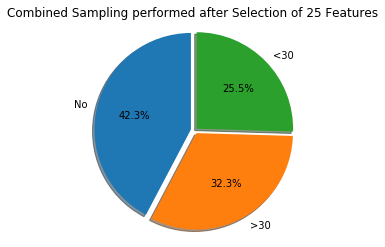

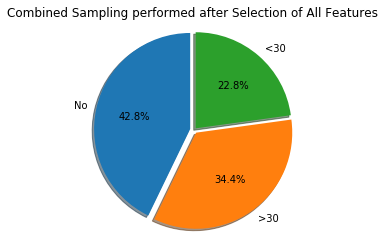

In [3]:
plot_pie_chart(classes, y_cs_10, 10)
plot_pie_chart(classes, y_cs_15, 15)
plot_pie_chart(classes, y_cs_25, 25)
plot_pie_chart(classes, y_cs_all, 'All')

In [4]:
kfold = StratifiedKFold(10, random_state=False, shuffle=True)

folds_10 = kfold.split(X_cs_10, y_cs_10)
folds_10 = [(train, test) for train, test in folds_10]

folds_15 = kfold.split(X_cs_15, y_cs_15)
folds_15 = [(train, test) for train, test in folds_15]

folds_25 = kfold.split(X_cs_25, y_cs_25)
folds_25 = [(train, test) for train, test in folds_25]

folds_all = kfold.split(X_cs_all, y_cs_all)
folds_all = [(train, test) for train, test in folds_all]

In [5]:
data_classes_10  = []
data_classes_15  = []
data_classes_25  = []
data_classes_all = []

for i in range(3):
    data_classes_10.append(len(y_cs_10[y_cs_10==i]))
for i in range(3):
    data_classes_15.append(len(y_cs_15[y_cs_15==i]))
for i in range(3):
    data_classes_25.append(len(y_cs_25[y_cs_25==i]))
for i in range(3):
    data_classes_all.append(len(y_cs_all[y_cs_all==i]))

In [6]:
trainer10 = Trainer(X=X_cs_10, y=y_cs_10, folds=folds_10, 
                  data_classes=data_classes_10, classes=classes)

trainer15 = Trainer(X=X_cs_15, y=y_cs_15, folds=folds_15, 
                  data_classes=data_classes_15, classes=classes)

trainer25 = Trainer(X=X_cs_25, y=y_cs_25, folds=folds_25, 
                  data_classes=data_classes_25, classes=classes)

trainerAll = Trainer(X=X_cs_all, y=y_cs_all, folds=folds_all, 
                  data_classes=data_classes_all, classes=classes)

----------------10 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   9.237399999999997   |
|    Accuracy   |   0.8720689747554878  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.8361327522170386 | 0.8120733681840948 | 0.955841561437205  |
|     Recall     | 0.7998150814702539 | 0.879502721655286  | 0.913342520671511  |
|  Specificity   | 0.9444232855268198 | 0.892827768031399  | 0.9725216727617688 |
|    F1-score    | 0.8173410200886024 | 0.844365433243814  | 0.934092091479147  |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---------+
|

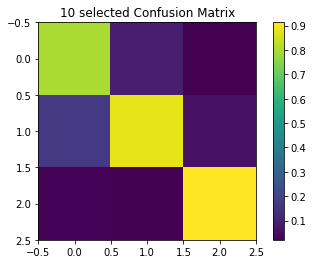

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   21.426499999999997  |
|    Accuracy   |   0.6517039227081501  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7044867069742263 | 0.5918419045348137 | 0.692624996736457  |
|     Recall     | 0.6125578844954622 | 0.6865302389347352 | 0.6483554566334726 |
|  Specificity   | 0.8853634813863103 | 0.7134535914598874 | 0.8679721328265215 |
|    F1-score    | 0.6552813733868406 | 0.6356425585334674 | 0.6696979344776761 |
+----------------+--------------------+--------------------+--------

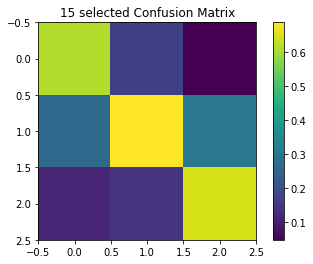

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   57.54449999999999   |
|    Accuracy   |   0.6213641802416394  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.6985058507329573 | 0.4933615593045476 | 0.6051183394165515 |
|     Recall     | 0.7754120656218751 | 0.3773890081057613 | 0.6745724065068889 |
|  Specificity   | 0.7547997213395068 | 0.8154758591330988 | 0.849598324101207  |
|    F1-score    | 0.7349383684800335 | 0.4276133048527525 | 0.6379281612132246 |
+----------------+--------------------+--------------------+--------

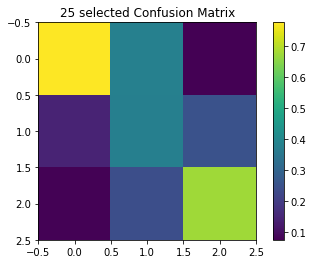

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   94.73849999999999   |
|    Accuracy   |   0.6180778750589284  |
+---------------+-----------------------+
+----------------+--------------------+---------------------+--------------------+
| Metric / Class |         No         |         >30         |        <30         |
+----------------+--------------------+---------------------+--------------------+
|   Percision    | 0.7008019964247703 | 0.49765743123179995 | 0.6145852575011832 |
|     Recall     | 0.7666449460477972 | 0.45680355147561524 | 0.5821082649319289 |
|  Specificity   | 0.7548594872276737 |  0.7586294102620463 | 0.892051333860884  |
|    F1-score    | 0.7322367876996687 | 0.47631504579754835 | 0.597845047612213  |
+----------------+--------------------+---------------------+

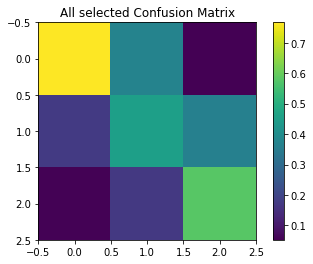

In [7]:
tables, xgboost_metrics_10 = trainer10.train_model(model_name='XGBoost')
table1, table2, conf_mat, conf_mat_norm_10 = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm_10, '10 selected')

print('----------------------------------------------------')

tables, xgboost_metrics_15 = trainer15.train_model(model_name='XGBoost')
table1, table2, conf_mat, conf_mat_norm_15 = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm_15, '15 selected')

print('----------------------------------------------------')

tables, xgboost_metrics_25 = trainer25.train_model(model_name='XGBoost')
table1, table2, conf_mat, conf_mat_norm_25 = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm_25, '25 selected')

print('----------------------------------------------------')

tables, xgboost_metrics_all = trainerAll.train_model(model_name='XGBoost')
table1, table2, conf_mat, conf_mat_norm_all = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm_all, 'All selected')

----------------10 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.764         |
|    Accuracy   |   0.7242203212694359  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.6163087901254116 | 0.690750427971936  | 0.8174869363680675 |
|     Recall     | 0.7058200075786283 | 0.5169836267815209 | 0.9176981210368833 |
|  Specificity   | 0.8452304781534188 | 0.8770495428933242 | 0.8665568930274812 |
|    F1-score    | 0.6575870773809193 | 0.5906783031963425 | 0.8646793531211309 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---------+
|

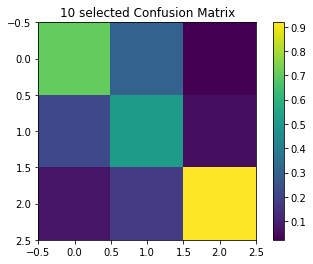

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   1.2696999999999998  |
|    Accuracy   |   0.5819937276717189  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.6228981832883305 | 0.5357100041251559 | 0.6181660949670407 |
|     Recall     | 0.4898818373496135 | 0.6403017644586002 | 0.6024443508891022 |
|  Specificity   | 0.8675418475107841 | 0.6641727565775503 | 0.8290437754206893 |
|    F1-score    | 0.5482047210257223 | 0.5832433089999145 | 0.6100892516959217 |
+----------------+--------------------+--------------------+--------

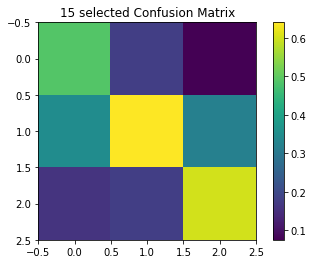

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   3.7030000000000003  |
|    Accuracy   |   0.5730343002286039  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.6508325374683144 | 0.4423707690074282 | 0.5780526428366705 |
|     Recall     | 0.7273487099666348 | 0.3973505978282859 | 0.5393111998765004 |
|  Specificity   | 0.7141193461179032 | 0.7615259539947985 | 0.8652958478996198 |
|    F1-score    | 0.6869529179351472 | 0.4185303509389384 | 0.5577108533663278 |
+----------------+--------------------+--------------------+--------

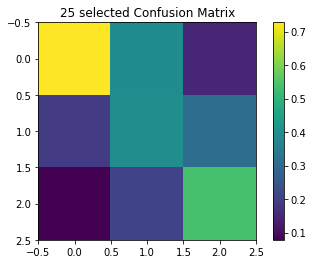

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   7.256400000000001   |
|    Accuracy   |   0.571023833324864   |
+---------------+-----------------------+
+----------------+--------------------+--------------------+---------------------+
| Metric / Class |         No         |        >30         |         <30         |
+----------------+--------------------+--------------------+---------------------+
|   Percision    | 0.6705573143823453 |  0.44412641276102  |  0.5812475158980936 |
|     Recall     | 0.7216477567005317 | 0.4832858136740244 | 0.42047815591834253 |
|  Specificity   | 0.7344338401720233 | 0.6832207743301643 |  0.910352354715371  |
|    F1-score    | 0.6951421452903237 | 0.4627754706963361 |  0.4874590736786608 |
+----------------+--------------------+--------------------+-

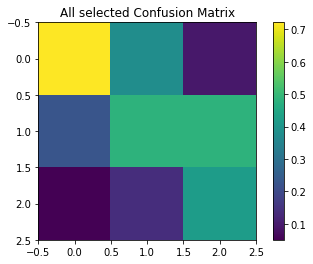

In [8]:
tables, adaboost_metrics_10 = trainer10.train_model(model_name='AdaBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, adaboost_metrics_15 = trainer15.train_model(model_name='AdaBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, adaboost_metrics_25 = trainer25.train_model(model_name='AdaBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, adaboost_metrics_all = trainerAll.train_model(model_name='AdaBoost')
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')

----------------10 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         1.9756        |
|    Accuracy   |   0.9878986777910788  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.978261765409927  | 0.9863331442080657 | 0.9957191223352254 |
|     Recall     | 0.9858419856006062 | 0.9832512688432693 | 0.9933247624615701 |
|  Specificity   | 0.9922712808134954 | 0.9928210113193534 | 0.9972177568816225 |
|    F1-score    | 0.9820349494944685 | 0.9847854869553269 | 0.9945192498211222 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---------+
|

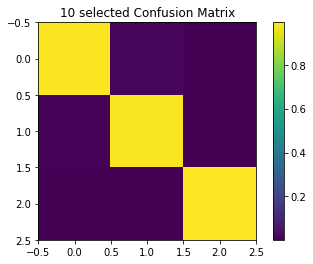

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         3.8128        |
|    Accuracy   |   0.9503830860651789  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9284095440907253 | 0.951765625461648  | 0.971325579540407  |
|     Recall     | 0.9586591432698557 | 0.9363250608161933 | 0.9591158621269844 |
|  Specificity   | 0.9670114889998673 | 0.971274448751917  | 0.9870043674385155 |
|    F1-score    | 0.9432833762259909 |  0.94397197949511  | 0.9651741077719649 |
+----------------+--------------------+--------------------+--------

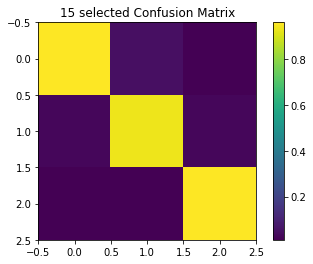

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   11.080499999999999  |
|    Accuracy   |   0.8381810359172528  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.8685961537994583 | 0.8095742627118371 | 0.8158514786115235 |
|     Recall     | 0.9434661467990149 | 0.7426578792960378 | 0.7843446919262089 |
|  Specificity   | 0.8954262923791276 | 0.9167840791977934 | 0.939511883876843  |
|    F1-score    | 0.9044803937436935 | 0.774635571554304  | 0.7997467470586141 |
+----------------+--------------------+--------------------+--------

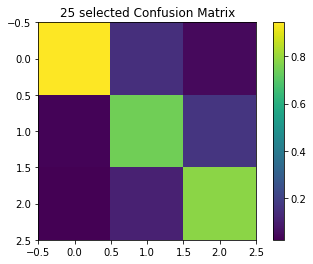

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        13.9958        |
|    Accuracy   |   0.8388018869208562  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.888652469670453  | 0.7861889121210266 | 0.8121158727465237 |
|     Recall     | 0.9677438224768625 | 0.7926078709518086 | 0.6663956821587895 |
|  Specificity   | 0.909167305054597  | 0.8871445568565791 | 0.9544168497431771 |
|    F1-score    | 0.9265069482401456 | 0.7893658232049277 | 0.7320200166357218 |
+----------------+--------------------+--------------------+--------

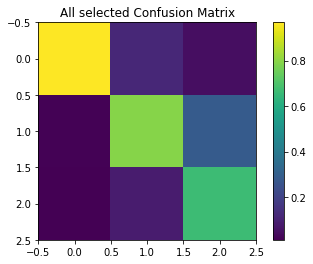

In [9]:
tables, xtrees_metrics_10 = trainer10.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, xtrees_metrics_15 = trainer15.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, xtrees_metrics_25 = trainer25.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, xtrees_metrics_all = trainerAll.train_model(model_name='XTrees')
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')

----------------10 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   3.5768999999999997  |
|    Accuracy   |   0.9600045235429027  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9329316145435371 | 0.9517456263337708 | 0.9854842563904018 |
|     Recall     | 0.937334293292914  | 0.9566387611328144 | 0.9779388710577634 |
|  Specificity   | 0.9762276410917667 | 0.9744445910081492 | 0.9906197438610403 |
|    F1-score    | 0.9351179375211206 | 0.9541741472707743 | 0.9816945251285581 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---------+
|

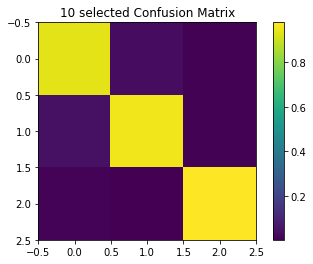

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   6.112699999999999   |
|    Accuracy   |   0.8492605872677729  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7906912379399987 | 0.8663099999081758 | 0.8902204130720006 |
|     Recall     | 0.827296715310706  | 0.843015801479787  | 0.8782846265365014 |
|  Specificity   | 0.9022936088249904 | 0.9212411614347145 | 0.9502451199951614 |
|    F1-score    | 0.8085684674536052 | 0.8544703375155285 | 0.8841706418214914 |
+----------------+--------------------+--------------------+--------

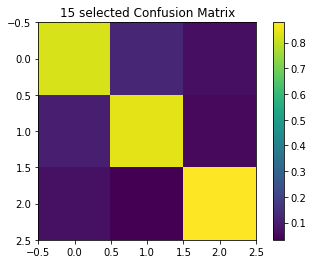

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |        18.0009        |
|    Accuracy   |   0.6714627610626147  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.6736840003497314 | 0.6468356741904426 | 0.6985249015047945 |
|     Recall     | 0.9303731153507309 | 0.4866325104937504 | 0.4756564538227007 |
|  Specificity   | 0.669838579471932  | 0.8735119022712758 | 0.9298537131649873 |
|    F1-score    | 0.781484994125426  | 0.5554067757357386 | 0.5659211702773496 |
+----------------+--------------------+--------------------+--------

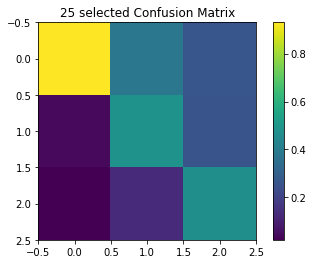

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         22.747        |
|    Accuracy   |   0.6742138281324366  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+---------------------+
| Metric / Class |         No         |        >30         |         <30         |
+----------------+--------------------+--------------------+---------------------+
|   Percision    | 0.6627315580827042 | 0.6774649976921854 |  0.731269269296618  |
|     Recall     | 0.9675074197897713 | 0.5203709051263286 | 0.35547955247830004 |
|  Specificity   | 0.6312272382620361 | 0.8703414922892405 |  0.9613657827614318 |
|    F1-score    | 0.7866254243109517 | 0.5885889519817014 |  0.4783614383990303 |
+----------------+--------------------+--------------------+-

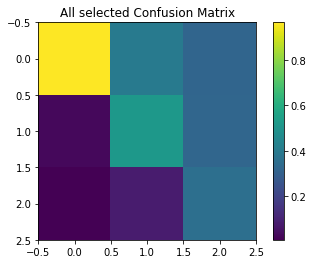

In [10]:
tables, knn_metrics_10 = trainer10.train_model(model_name='KNN')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, knn_metrics_15 = trainer15.train_model(model_name='KNN')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, knn_metrics_25 = trainer25.train_model(model_name='KNN')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, knn_metrics_all = trainerAll.train_model(model_name='KNN')
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')

----------------10 Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |  0.019899999999999994 |
|    Accuracy   |   0.8566131646948296  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |         No         |        >30         |        <30         |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.8130627894006917 | 0.7875406120379533 | 0.9568253266223634 |
|     Recall     | 0.7899052292535051 | 0.8594966615083273 | 0.8982010283720381 |
|  Specificity   | 0.9358907903272794 | 0.8778575799646602 | 0.9736081375337078 |
|    F1-score    | 0.801235185311452  | 0.8219107956184708 | 0.9265745330783742 |
+----------------+--------------------+--------------------+--------------------+
+-----+---------+---------+---------+
|

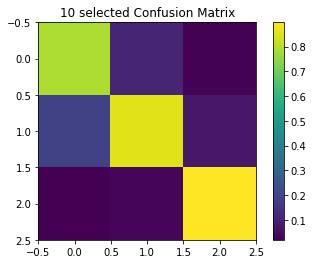

----------------------------------------------------
----------------15 Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.0487        |
|    Accuracy   |   0.5464287381653719  |
+---------------+-----------------------+
+----------------+--------------------+---------------------+--------------------+
| Metric / Class |         No         |         >30         |        <30         |
+----------------+--------------------+---------------------+--------------------+
|   Percision    | 0.5452466485194465 |  0.5434202138283923 |  0.5505172975427   |
|     Recall     | 0.5677432035349955 |  0.3986778742673337 | 0.7026107379775947 |
|  Specificity   | 0.7881217298629573 |  0.7968346158632903 | 0.7367065875397298 |
|    F1-score    | 0.5558380258538639 | 0.45922530871379835 | 0.6172195013850582 |
+----------------+--------------------+---------------------+

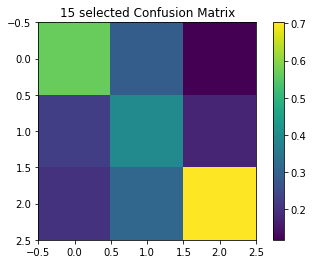

----------------------------------------------------
----------------25 Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |  0.19669999999999999  |
|    Accuracy   |   0.5276669567036507  |
+---------------+-----------------------+
+----------------+--------------------+---------------------+---------------------+
| Metric / Class |         No         |         >30         |         <30         |
+----------------+--------------------+---------------------+---------------------+
|   Percision    |  0.57205706436493  |  0.4081604353620076 |  0.5516939843134545 |
|     Recall     | 0.778633590844003  | 0.30689016032383937 |  0.3905782172629385 |
|  Specificity   | 0.5728649226736852 |  0.7878684749499173 |  0.8898684807005985 |
|    F1-score    | 0.6593912147338921 | 0.34965787901360956 | 0.45408762554694365 |
+----------------+--------------------+---------------

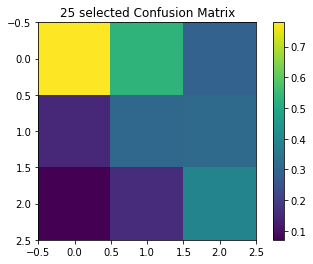

----------------------------------------------------
---------------All Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |  0.43220000000000003  |
|    Accuracy   |   0.5464848822201943  |
+---------------+-----------------------+
+----------------+--------------------+---------------------+--------------------+
| Metric / Class |         No         |         >30         |        <30         |
+----------------+--------------------+---------------------+--------------------+
|   Percision    | 0.682427323549441  | 0.43662640552688164 | 0.4728964932015506 |
|     Recall     | 0.6493176112034037 | 0.41215900924913634 | 0.5557607210890929 |
|  Specificity   | 0.773692568468465  |  0.721593351247986  | 0.8168369471605091 |
|    F1-score    | 0.6654326575503581 |  0.4240169048770161 | 0.5109735586735205 |
+----------------+--------------------+---------------------+

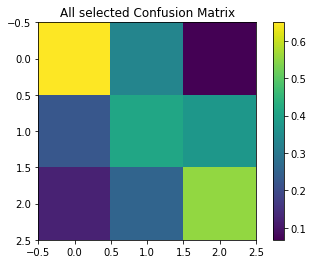

In [11]:
tables, dt_metrics_10 = trainer10.train_model(model_name='DT')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------10 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '10 selected')

print('----------------------------------------------------')

tables, dt_metrics_15 = trainer15.train_model(model_name='DT')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')

print('----------------------------------------------------')

tables, dt_metrics_25 = trainer25.train_model(model_name='DT')
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------25 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '25 selected')

print('----------------------------------------------------')

tables, dt_metrics_all = trainerAll.train_model(model_name='DT')
table1, table2, conf_mat, conf_mat_norm = tables
print('---------------All Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, 'All selected')